Tentativa de reproducao da rede neural proposta em https://doi.org/10.1016/j.physa.2018.07.017

In [1]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import pandas as pd
from datetime import datetime
from tqdm import tqdm
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
import numpy as np
from tqdm import tqdm

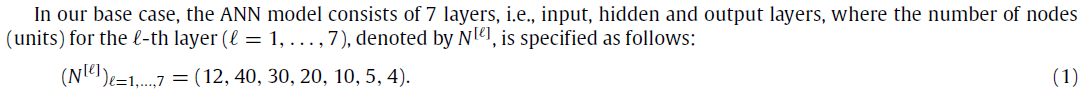

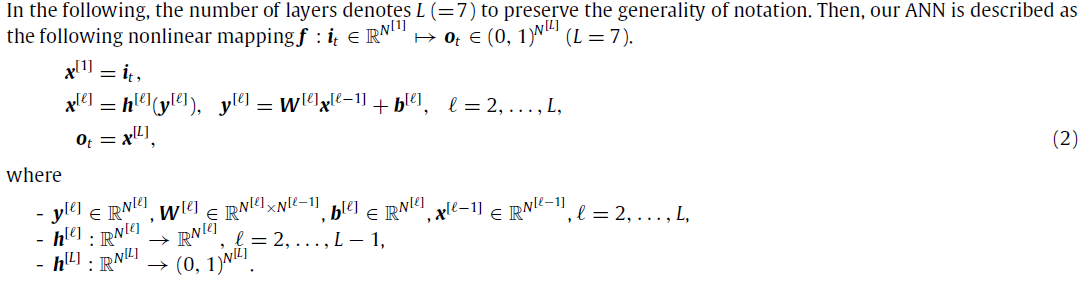

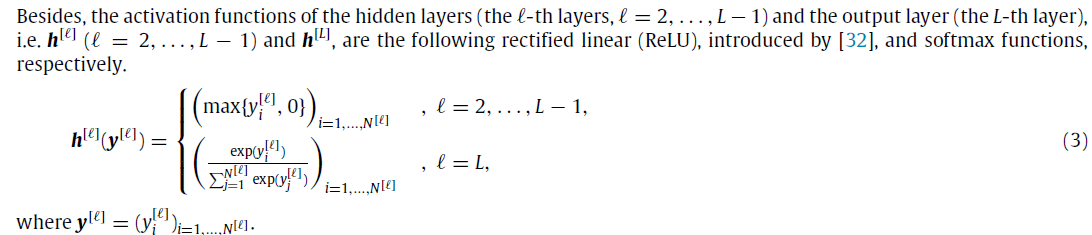

In [2]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(12,40)
        self.activation = nn.ReLU()
        self.linear2 = nn.Linear(40,30)
        self.linear3 = nn.Linear(30,20)
        self.linear4 = nn.Linear(20,10)
        self.linear5 = nn.Linear(10,5)
        self.linear6 = nn.Linear(5,4)
        self.output_layer = nn.Linear(4,4)
        self.softmax = nn.Softmax()
        self.layer_list = [self.linear1, self.linear2,
                           self.linear3, self.linear4, 
                           self.linear5, self.linear6]
        
    def forward(self, x):
        for layer in self.layer_list:
            x = layer(x)
            x = self.activation(x)
        x = self.output_layer(x)
        output = self.softmax(x)
        return output

In [11]:
class BitcoinDataset(Dataset):
    sample_interval = '12h'
    def __init__(self, src_file=rf'data\ann_data\2021_2024\neural_net_input_data_{sample_interval}.csv'):
        self.input = pd.read_csv(src_file)
        self.label = pd.read_csv(rf'data\ann_data\2021_2024\labels_{self.sample_interval}.csv')
        self.input = torch.tensor(self.input.values, dtype=torch.float32)
        self.label = torch.tensor(self.label.values, dtype=torch.float32)
        
    def __len__(self):
        return self.input.shape[0]
    
    def __getitem__(self, index):
        sample = {'input':self.input[index], 'label':self.label[index]}
        return sample

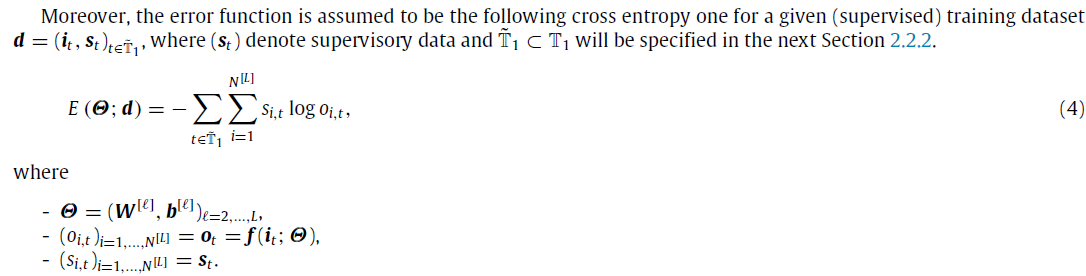

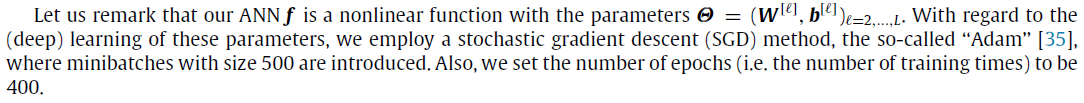

In [12]:
model = Net()
batch_size = 500
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
training_to_test_ratio = .70
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
d = BitcoinDataset()
indices = list(range(len(d)))
train_test_idx_split = int(len(d)*training_to_test_ratio)
# train_test_idx_split = 79167
train_indices, val_indices = indices[:train_test_idx_split], indices[train_test_idx_split:]
dataloader = DataLoader(d, shuffle=True, batch_size=batch_size, drop_last=True)
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)
training_loader = DataLoader(d, batch_size=batch_size, drop_last=True, sampler=train_sampler)
validation_loader = DataLoader(d, batch_size=1, drop_last=True, sampler=valid_sampler)

In [13]:
def train_one_epoch():
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data['input'],data['label']
        

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        # if i % 1000 == 999:
        #     last_loss = running_loss / 1000 # loss per batch
        #     print('  batch {} loss: {}'.format(i + 1, last_loss))
        #     tb_x = epoch_index * len(training_loader) + i + 1
        #     tb_writer.add_scalar('Loss/train', last_loss, tb_x)
        #     running_loss = 0.

    return last_loss

In [14]:
EPOCHS = 400
epoch_number = 0
best_vloss = 1_000_000.
for epoch in range(EPOCHS):
    print(f'EPOCH {epoch_number + 1}:')

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch()


    # running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    # model.eval()

    # # Disable gradient computation and reduce memory consumption.
    # with torch.no_grad():
    #     for i, vdata in enumerate(validation_loader):
    #         vinputs, vlabels = vdata['input'],vdata['label']
    #         voutputs = model(vinputs)
    #         vloss = loss_fn(voutputs, vlabels)
    #         running_vloss += vloss

    # avg_vloss = running_vloss / (i + 1)
    # print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))
    print('LOSS train {}'.format(avg_loss))
    

    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    intervalo = '2021_2024'
    
    
    # Track best performance, and save the model's state
    # if avg_vloss < best_vloss:
    #     best_vloss = avg_vloss
    #     model_path = r'./saved_models/model_{}_{}'.format(timestamp, epoch_number)
    #     torch.save(model.state_dict(), model_path)
    if epoch_number%50==0:
        model_path = rf'./saved_models/model_{d.sample_interval}_{epoch_number}'
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:
LOSS train 0.0
EPOCH 2:
LOSS train 0.0
EPOCH 3:
LOSS train 0.0
EPOCH 4:
LOSS train 0.0
EPOCH 5:
LOSS train 0.0
EPOCH 6:
LOSS train 0.0
EPOCH 7:
LOSS train 0.0
EPOCH 8:
LOSS train 0.0
EPOCH 9:
LOSS train 0.0
EPOCH 10:
LOSS train 0.0
EPOCH 11:
LOSS train 0.0
EPOCH 12:
LOSS train 0.0
EPOCH 13:
LOSS train 0.0
EPOCH 14:
LOSS train 0.0
EPOCH 15:
LOSS train 0.0
EPOCH 16:
LOSS train 0.0
EPOCH 17:
LOSS train 0.0
EPOCH 18:
LOSS train 0.0
EPOCH 19:
LOSS train 0.0
EPOCH 20:


c:\Users\luisg\anaconda3\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


LOSS train 0.0
EPOCH 21:
LOSS train 0.0
EPOCH 22:
LOSS train 0.0
EPOCH 23:
LOSS train 0.0
EPOCH 24:
LOSS train 0.0
EPOCH 25:
LOSS train 0.0
EPOCH 26:
LOSS train 0.0
EPOCH 27:
LOSS train 0.0
EPOCH 28:
LOSS train 0.0
EPOCH 29:
LOSS train 0.0
EPOCH 30:
LOSS train 0.0
EPOCH 31:
LOSS train 0.0
EPOCH 32:
LOSS train 0.0
EPOCH 33:
LOSS train 0.0
EPOCH 34:
LOSS train 0.0
EPOCH 35:
LOSS train 0.0
EPOCH 36:
LOSS train 0.0
EPOCH 37:
LOSS train 0.0
EPOCH 38:
LOSS train 0.0
EPOCH 39:
LOSS train 0.0
EPOCH 40:
LOSS train 0.0
EPOCH 41:
LOSS train 0.0
EPOCH 42:
LOSS train 0.0
EPOCH 43:
LOSS train 0.0
EPOCH 44:
LOSS train 0.0
EPOCH 45:
LOSS train 0.0
EPOCH 46:
LOSS train 0.0
EPOCH 47:
LOSS train 0.0
EPOCH 48:
LOSS train 0.0
EPOCH 49:
LOSS train 0.0
EPOCH 50:
LOSS train 0.0
EPOCH 51:
LOSS train 0.0
EPOCH 52:
LOSS train 0.0
EPOCH 53:
LOSS train 0.0
EPOCH 54:
LOSS train 0.0
EPOCH 55:
LOSS train 0.0
EPOCH 56:
LOSS train 0.0
EPOCH 57:
LOSS train 0.0
EPOCH 58:
LOSS train 0.0
EPOCH 59:
LOSS train 0.0
EPOCH 60:


In [7]:
model = Net()
model.load_state_dict(torch.load(r'saved_models\model_1h_350'))

<All keys matched successfully>

In [8]:
model.eval()
preds,truth=[],[]
preds_df = pd.DataFrame(columns=['pred', 'true'])

for data in validation_loader:
    inputs, labels = data['input'],data['label']
    output = model(inputs).tolist()[0]
    label = labels.tolist()[0]
    pred = max(range(len(output)), key=output.__getitem__)
    actual = max(range(len(label)), key=label.__getitem__)
    preds.append(pred)
    truth.append(actual)
preds_df['pred'] = preds
preds_df['true'] = truth

(preds_df['pred']==preds_df['true']).value_counts()
    

c:\Users\luisg\anaconda3\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


False    5197
True     3043
dtype: int64

In [11]:
intervalo

'1d'

In [15]:
full_data_df = pd.read_csv(rf'data\ann_data\2021_2024\full_data_with_true_labels_{d.sample_interval}.csv')
timestamp_inicio_validacao = full_data_df.loc[train_test_idx_split,'timestamp_ms']
# test_data_df = full_data_df[train_test_idx_split:].reset_index(drop=True)
timestamp_inicio_validacao

1690027200000

In [ ]:
atributos_input = ['EMA2', 'EMA4', 'EMA12', 'EMA24', 'EMSD2', 'EMSD4', 'EMSD12', 'EMSD24', 'RSI12', 'RSI24', 'RSI48', 'prev_return']

In [ ]:
full_data_df[full_data_df['timestamp_ms']==timestamp_inicio_validacao][atributos_input]

,EMA2,EMA4,EMA12,EMA24,EMSD2,EMSD4,EMSD12,EMSD24,RSI12,RSI24,RSI48,prev_return
36513,0.001677,-0.0274,-0.019781,-0.009246,0.204282,0.184942,0.170425,0.190168,0.326864,0.507533,0.488343,0.07481


In [ ]:
list(validation_loader)[0]

{'input': tensor([[ 1.8934e-03, -3.6529e-02, -1.6164e-02,  3.6725e-04,  2.9706e-01,
           2.6087e-01,  2.4624e-01,  2.3629e-01,  4.8929e-01,  5.0196e-01,
           4.8290e-01,  1.0533e-01]]),
 'label': tensor([[0., 1., 0., 0.]])}

In [ ]:
full_df_with_predictions = pd.concat([test_data_df, preds_df['pred']], axis=1)
full_df_with_predictions.to_csv(r'data\ann_data\full_data_with_predicions.csv', index=False)

In [ ]:
(full_df_with_predictions['pred']==full_df_with_predictions['label']).value_counts()

False    9160
True     4345
dtype: int64